In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# https://wikidocs.net/92085

In [4]:
goodred = "#DF6B63"
goodblue = "#546BDF"
goodpurple = "#8C6CE7"
goodgreen = "#40DE66"
goodpink = "#FF9999"
c2 = "#2DA02D"
c3 = "#D73132"
c6 = "#E379C2"
c8 = "#BCBD22"

# Plotting parameters
deepdft   = [2.04e6,2.95e-2,'DeepDFT',None          ,None]
deepdft2  = [2.93e6,1.03e-2,'DeepDFT2',None         ,None]
egnn      = [2.27e6,11.92e-2,'EGNN',(10,-5)         ,None]
DimeNet   = [2.31e6,11.97e-2,'DimeNet',(10,5)       ,None]
DimeNet2p = [2.02e6,11.69e-2,'DimeNet++',(-30,-15)   ,None]
gno       = [1.84e6,40.86e-2,'GNO',None             ,None]
fno       = [33.63e6,28.83e-2,'FNO',(-30,-5)            ,None]
lno       = [803e3,26.14e-2,'LNO',None              ,None]
GPWNO    = [0.646e6,0.73e-2,'GPW-NO',(0,+5)        ,goodred]
# 646,848

model_list = [
    deepdft,
    deepdft2,
    egnn,
    DimeNet,
    DimeNet2p,
    gno,
    fno,
    lno,
]

infgcn_list = [
    # [0.11e6,12.02e-2,'s0'],
    # [0.13e6,8.07e-2,'s1'],
    # [0.17e6,4.65e-2,'s2'],
    # [0.26e6,1.46e-2,'s3'],
    # [0.39e6,1.08e-2,'s4',goodgreen],
    # [0.58e6,1.11e-2,'s5',goodgreen],
    # [0.85e6,1.01e-2,'s6',goodgreen],
    [1.20e6,0.93e-2,'s7',goodgreen],
]

infgcn_x = [x[0] for x in infgcn_list]
infgcn_y = [x[1] for x in infgcn_list]
infgcn_label = [x[2] for x in infgcn_list]

In [21]:
!fc-list

/usr/share/fonts/truetype/lato/Lato-Medium.ttf: Lato,Lato Medium:style=Medium,Regular
/usr/share/fonts/X11/Type1/lmtti10.pfb: LMMono10:style=Italic
/usr/share/fonts/truetype/adf/AccanthisADFStd-Regular.otf: Accanthis ADF Std:style=Regular
/usr/share/fonts/truetype/lato/Lato-SemiboldItalic.ttf: Lato,Lato Semibold:style=Semibold Italic,Italic
/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf: DejaVu Serif:style=Bold
/usr/share/fonts/truetype/noto/NotoSansThai-Regular.ttf: Noto Sans Thai:style=Regular
/usr/share/fonts/truetype/noto/NotoSansModi-Regular.ttf: Noto Sans Modi:style=Regular
/usr/share/fonts/opentype/tlwg/Sawasdee-Bold.otf: Sawasdee:style=Bold
/usr/share/fonts/opentype/urw-base35/URWBookman-LightItalic.otf: URW Bookman:style=Light Italic
/usr/share/fonts/truetype/ebgaramond/EBGaramond-InitialsF1.ttf: EB Garamond Initials Fill1:style=Regular
/usr/share/fonts/truetype/noto/NotoSansPahawhHmong-Regular.ttf: Noto Sans Pahawh Hmong:style=Regular
/usr/share/fonts/truetype/comforta

/tmp/ipykernel_845351/3030732012.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "om-" (-> color='m'). The keyword argument will take precedence.
  ax.loglog(np.array(infgcn_x)*1e-6,np.array(infgcn_y)*1e2,'om-',color="seagreen")


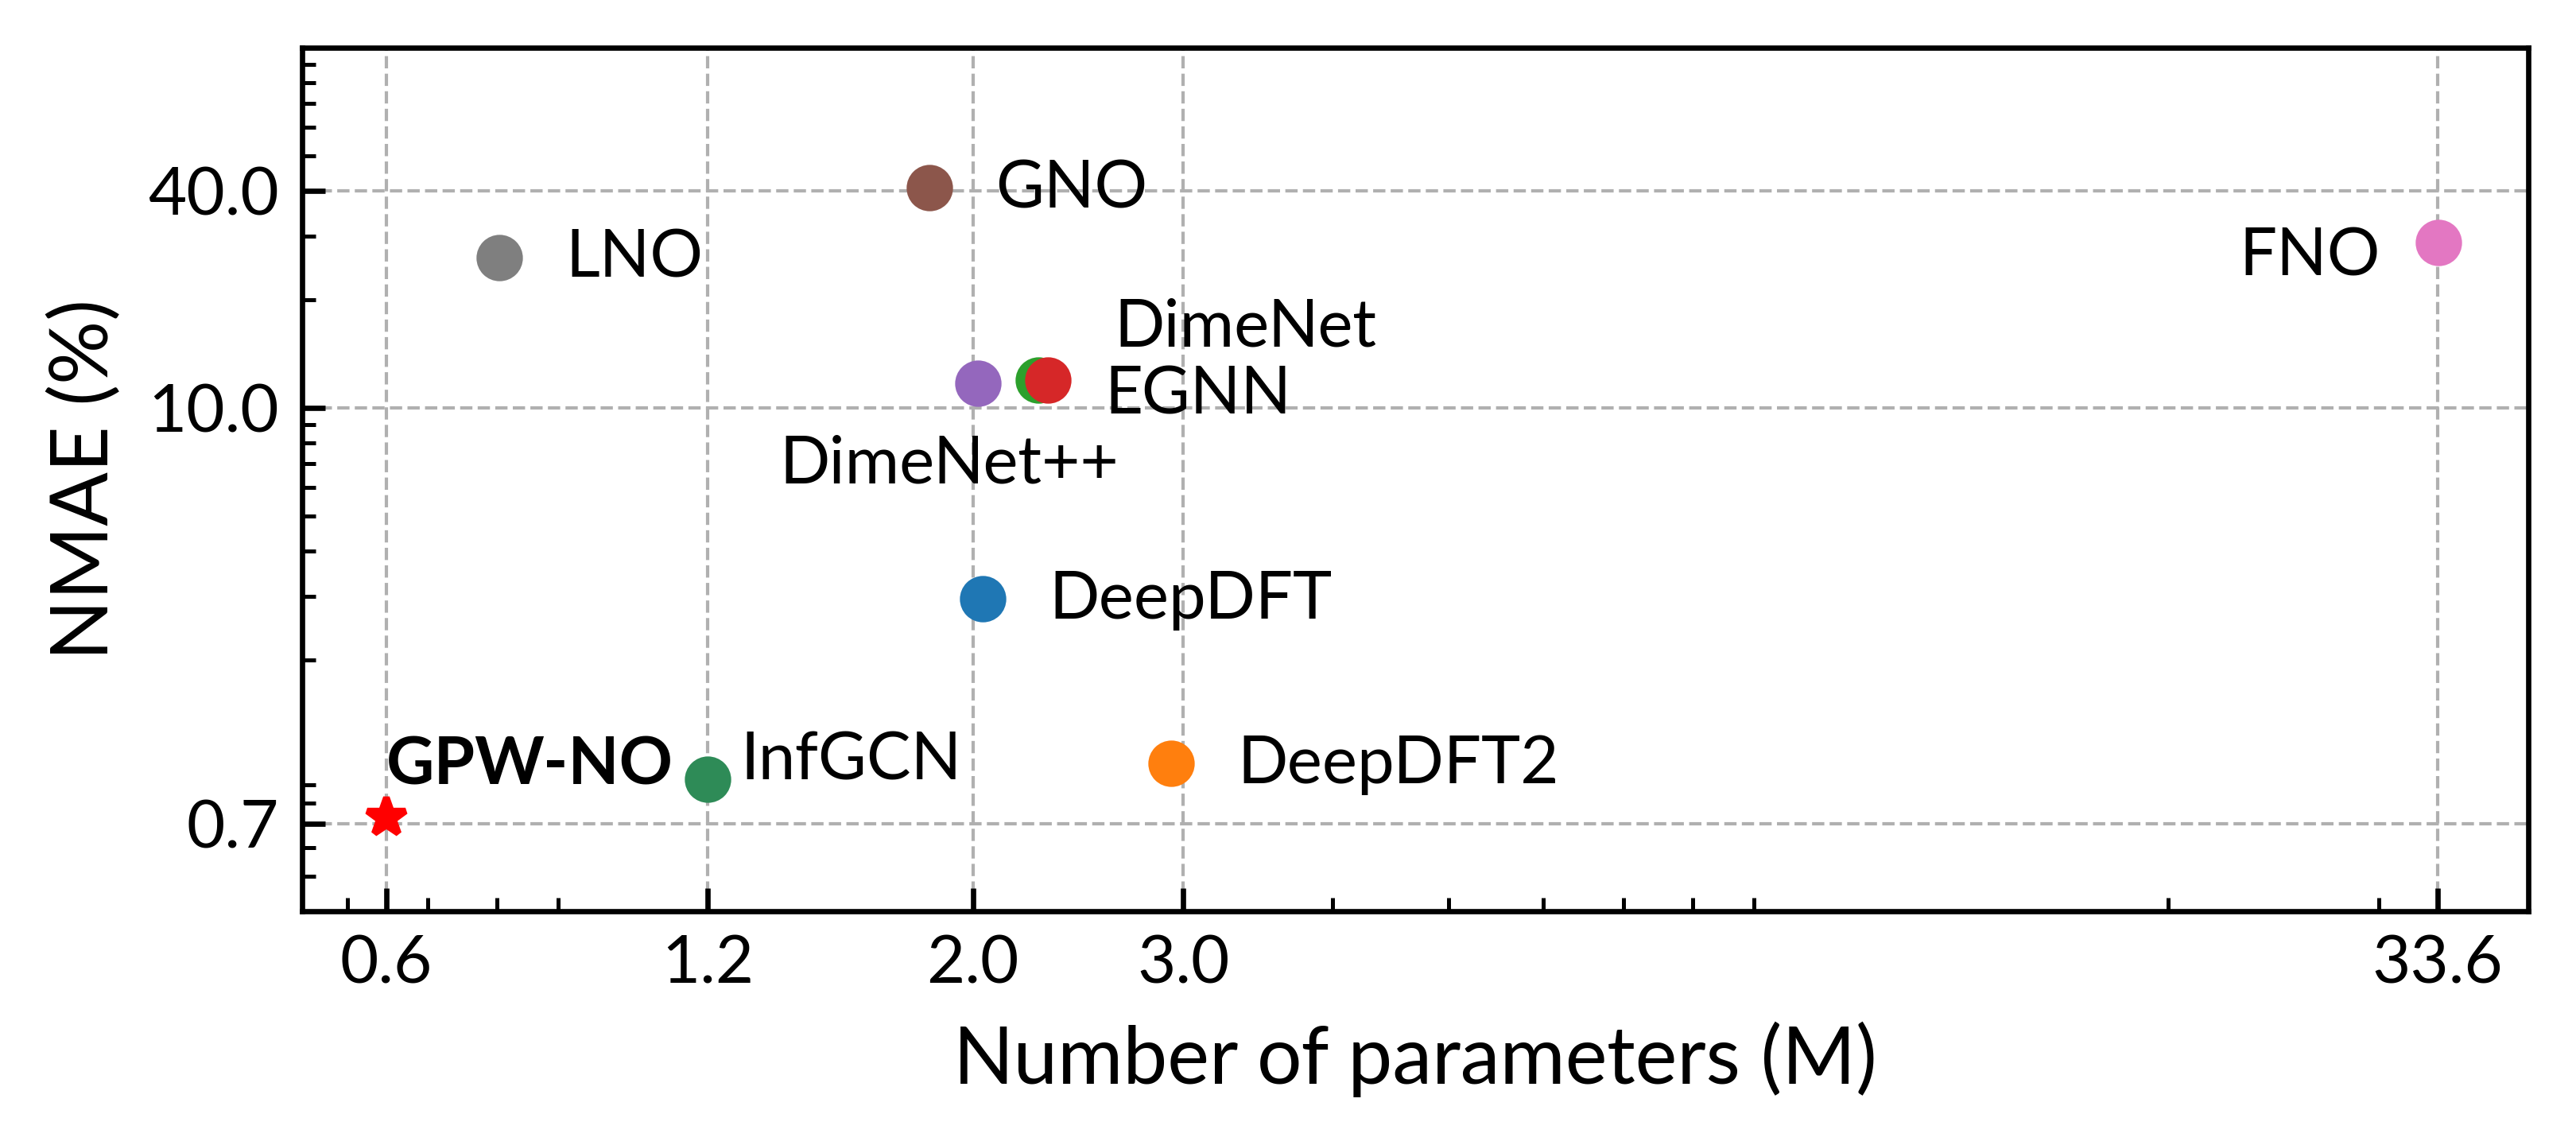

In [10]:
# import seaborn as sns
# sns.set_theme('whitegrid')
# for style in plt.style.available:
import matplotlib
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
# matplotlib.rcParams['font.family'] = ['Open Sans']
matplotlib.rcParams['font.family'] = ['Lato']
# matplotlib.rcParams['font.weight'] = ['normal']



fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.5)
fig.set_dpi(600)
ax.set_facecolor('white')
# ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f'))

# ax.hlines(GPWNO[1]*1e2,0.1,1e4,linestyle='--',color='gray',linewidth=0.5)
# ax.vlines(GPWNO[0]*1e-6,1e-2,1e2,linestyle='--',color='gray',linewidth=0.5)

for model in model_list:
    ax.loglog(model[0]*1e-6,model[1]*1e2,label=model[2],marker='o',color=model[4])
    if model[3] is None:
        xytext = (10,-3)
    else:
        xytext = model[3]
    ax.annotate(model[2], (model[0]*1e-6, model[1]*1e2), textcoords="offset points", xytext=xytext, ha='left',color='k')

ax.loglog(GPWNO[0]*1e-6,GPWNO[1]*1e2,label=GPWNO[2],marker="*",color="red")
ax.annotate(GPWNO[2], (GPWNO[0]*1e-6, GPWNO[1]*1e2), textcoords="offset points", xytext=GPWNO[3], ha='left',color='k',fontweight='bold')

ax.loglog(np.array(infgcn_x)*1e-6,np.array(infgcn_y)*1e2,'om-',color="seagreen")
for infgcn in infgcn_list:
    ax.annotate("InfGCN", (infgcn[0]*1e-6, infgcn[1]*1e2), textcoords="offset points", xytext=(5,0), ha='left',color='k')
# ax.text(0.5, 0.5, 'Infinite GCN', transform=ax.transAxes, rotation=90)

for axis in [ax.xaxis, ax.yaxis]:
    # axis.set_major_formatter(ScalarFormatter())
    axis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

ax.tick_params(direction='in', which='both')

ax.set_xlabel('Number of parameters (M)',size="large")
ax.set_ylabel('NMAE (%)',size="large")
ax.set_xlim([5.5e-1,0.40e2])
ax.set_ylim([4e-1,1e2])
ax.yaxis.set_ticks([1e1,4e1,0.7])
ax.xaxis.set_ticks([0.646,1.20,2,3,33.6])
# ax.yaxis.set_ticks([1e-2,1e-1,1e0,1e1,1e2])
# ax.xaxis.set_ticks([1e-1,1e0,1e1,1e2,1e3,1e4])
# ax.set_title('Number of params. vs. NMAE on QM9',color='k',fontsize=12)
# ax.set_title('Number of params. vs. NMAE on QM9',color='k',size="large")

ax.grid(True,which='major',linestyle='--',linewidth=0.5)
# ax.legend()
plt.tight_layout()
plt.savefig('params_vs_nmae.pdf',dpi=600,bbox_inches='tight')
plt.show()

/tmp/ipykernel_444118/1026801927.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "om-" (-> color='m'). The keyword argument will take precedence.
  ax.loglog(np.array(infgcn_x)*1e-6,np.array(infgcn_y)*1e2,'om-',color="seagreen")


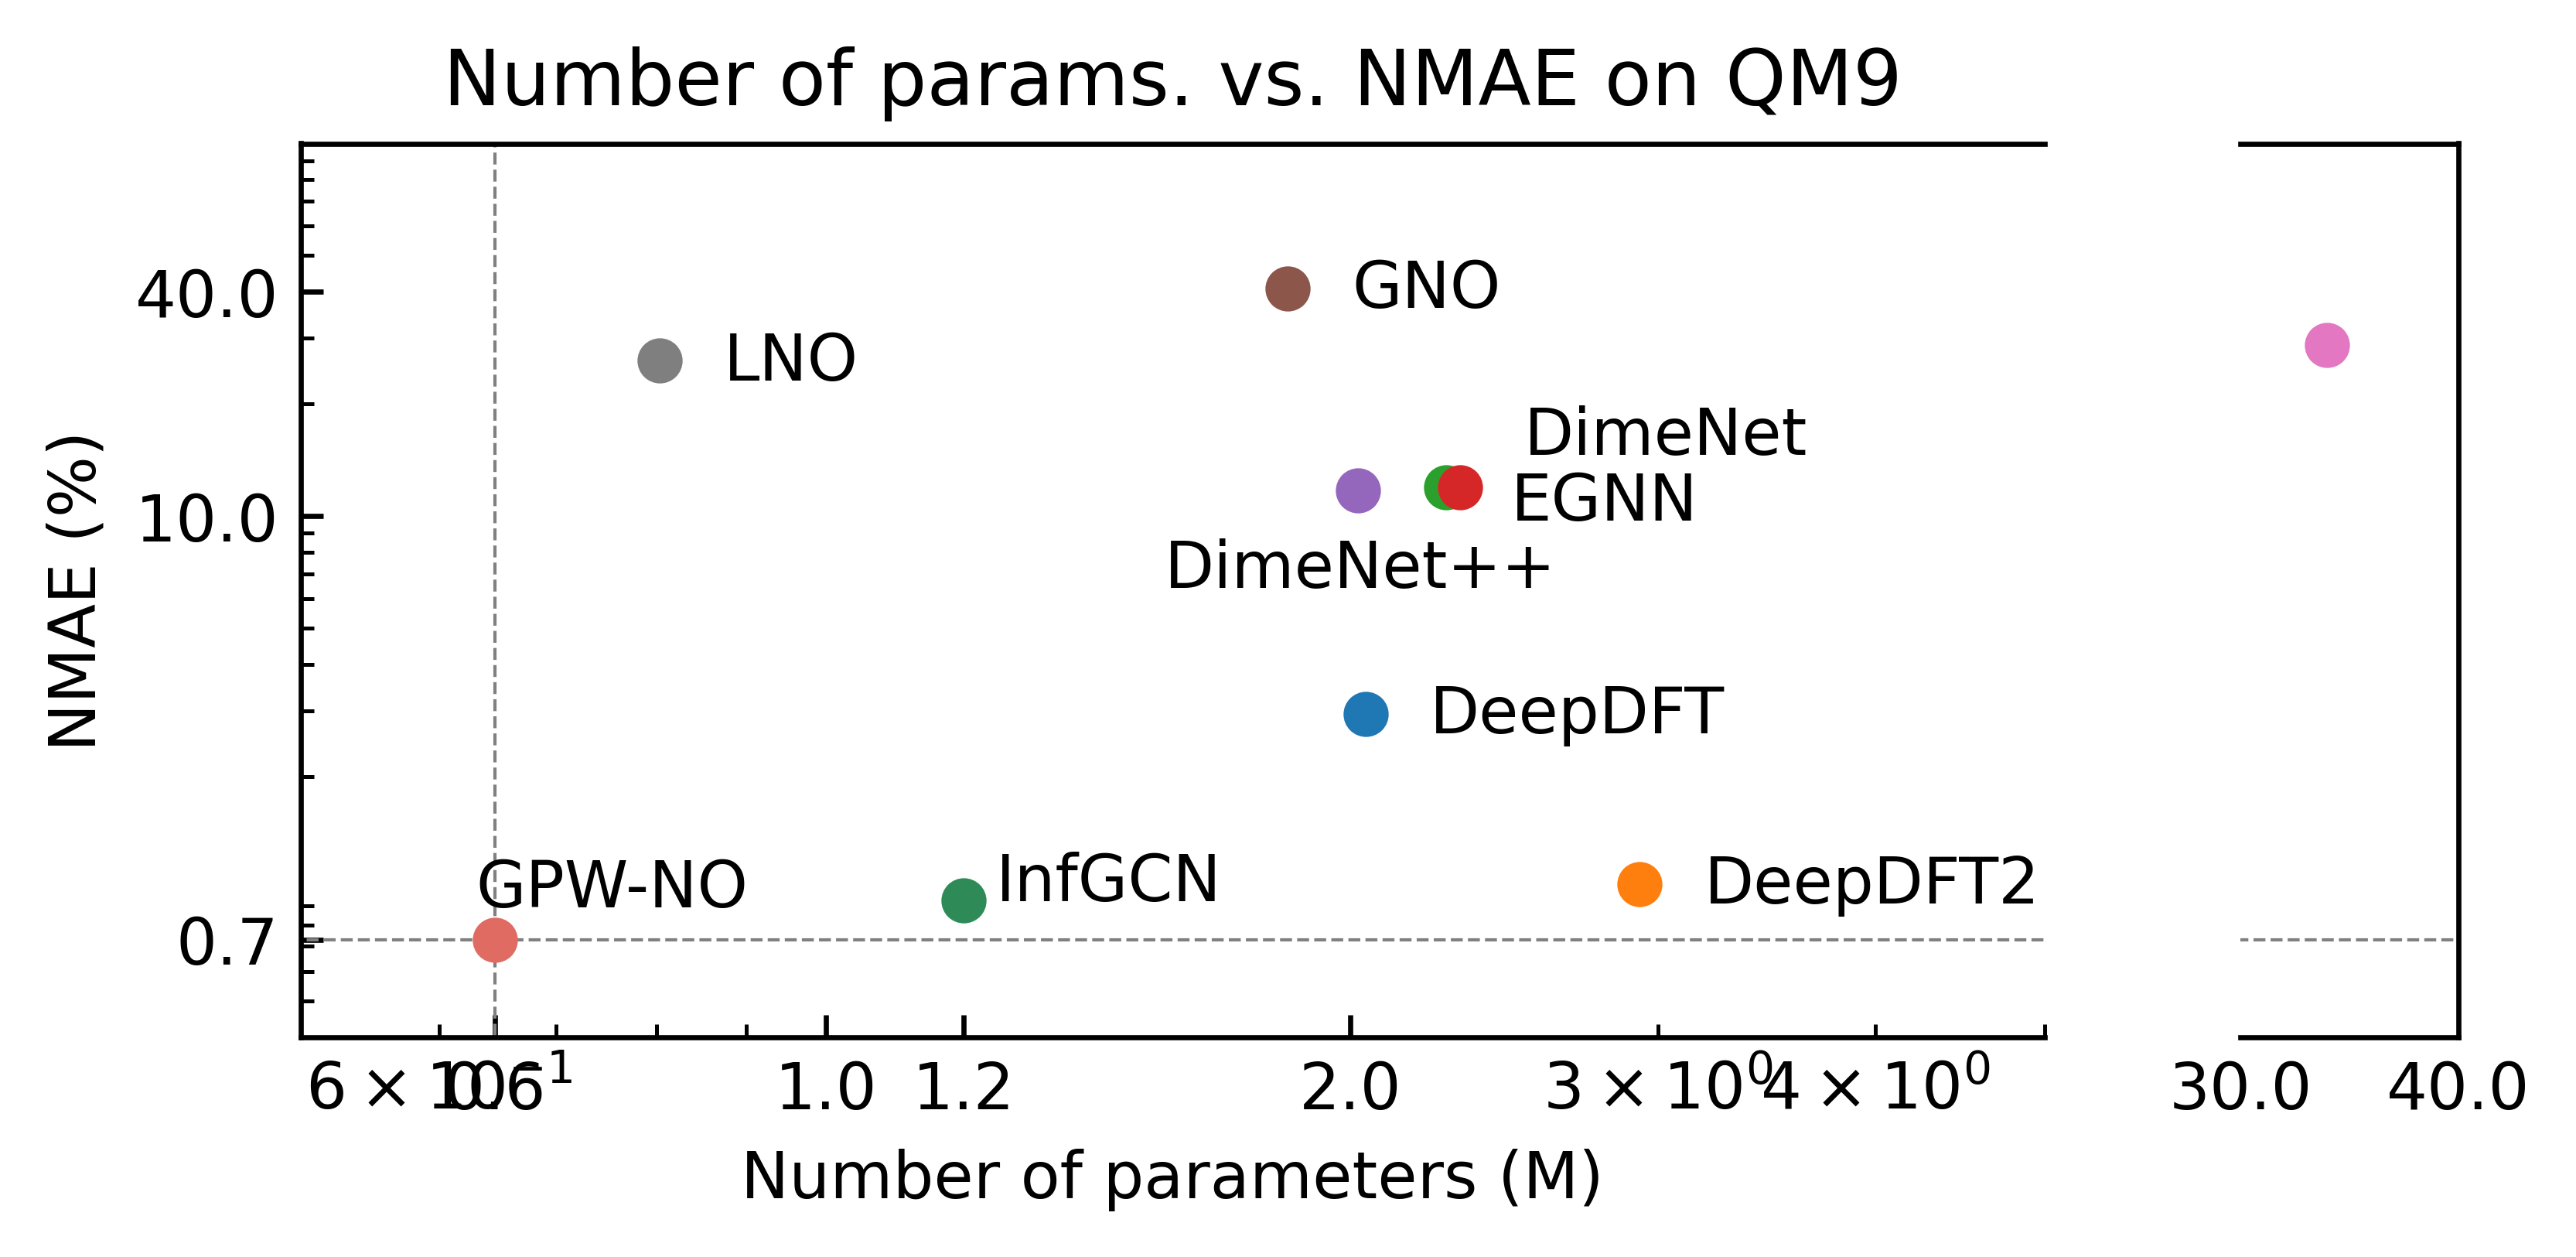

In [367]:
# # import seaborn as sns
# # sns.set_theme('whitegrid')
# # for style in plt.style.available:
# import matplotlib
# from matplotlib import ticker
# from matplotlib.ticker import ScalarFormatter
# # matplotlib.rcParams['font.family'] = ['Open Sans']
# matplotlib.rcParams['font.family'] = ['DejaVu Sans']


# fig, (ax, ax2) = plt.subplots(1, 2, sharey=True,gridspec_kw={'width_ratios': [4, 0.5]})
# fig.set_size_inches(6, 2.5)
# fig.set_dpi(600)
# fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# ax.set_facecolor('white')
# # ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f'))

# ax.hlines(GPWNO[1]*1e2,0.1,1e4,linestyle='--',color='gray',linewidth=0.5)
# ax.vlines(GPWNO[0]*1e-6,1e-2,1e2,linestyle='--',color='gray',linewidth=0.5)

# for model in model_list:
#     ax.loglog(model[0]*1e-6,model[1]*1e2,label=model[2],marker='o',color=model[4])
#     ax2.loglog(model[0]*1e-6,model[1]*1e2,label=model[2],marker='o',color=model[4])
#     if model[3] is None:
#         xytext = (10,-3)
#     else:
#         xytext = model[3]
#     ax.annotate(model[2], (model[0]*1e-6, model[1]*1e2), textcoords="offset points", xytext=xytext, ha='left',color='k')

# ax.loglog(np.array(infgcn_x)*1e-6,np.array(infgcn_y)*1e2,'om-',color="seagreen")
# for infgcn in infgcn_list:
#     ax.annotate("InfGCN", (infgcn[0]*1e-6, infgcn[1]*1e2), textcoords="offset points", xytext=(5,0), ha='left',color='k')
# # ax.text(0.5, 0.5, 'Infinite GCN', transform=ax.transAxes, rotation=90)

# for axis in [ax.xaxis, ax.yaxis]:
#     # axis.set_major_formatter(ScalarFormatter())
#     axis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# ax.tick_params(direction='in', which='both')

# ax.set_xlabel('Number of parameters (M)')
# ax.set_ylabel('NMAE (%)')
# ax.set_xlim([5e-1,5])
# ax.set_ylim([4e-1,1e2])
# ax.yaxis.set_ticks([1e1,4e1,0.73])
# ax.xaxis.set_ticks([1,0.646,1.20,2.0])
# # ax.yaxis.set_ticks([1e-2,1e-1,1e0,1e1,1e2])
# # ax.xaxis.set_ticks([1e-1,1e0,1e1,1e2,1e3,1e4])
# ax.set_title('Number of params. vs. NMAE on QM9',color='k',fontsize=12)
# # ax.legend()

# ax.spines.right.set_visible(False)

# ax2.hlines(GPWNO[1]*1e2,0.1,1e4,linestyle='--',color='gray',linewidth=0.5)
# # ax2.set_xlim([20,0.40e2])
# ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
# ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
# ax2.set_xlim([30,40])
# ax2.xaxis.set_ticks_position('none')
# ax2.xaxis.set_ticks([30.0,40.0])
# ax2.tick_params(direction='in', which='both')
# # ax2.yaxis.set_ticks([])
# ax2.yaxis.set_ticks_position('none')
# ax2.spines.left.set_visible(False)

# plt.savefig('params_vs_nmae.pdf',dpi=600,bbox_inches='tight')
# plt.show()

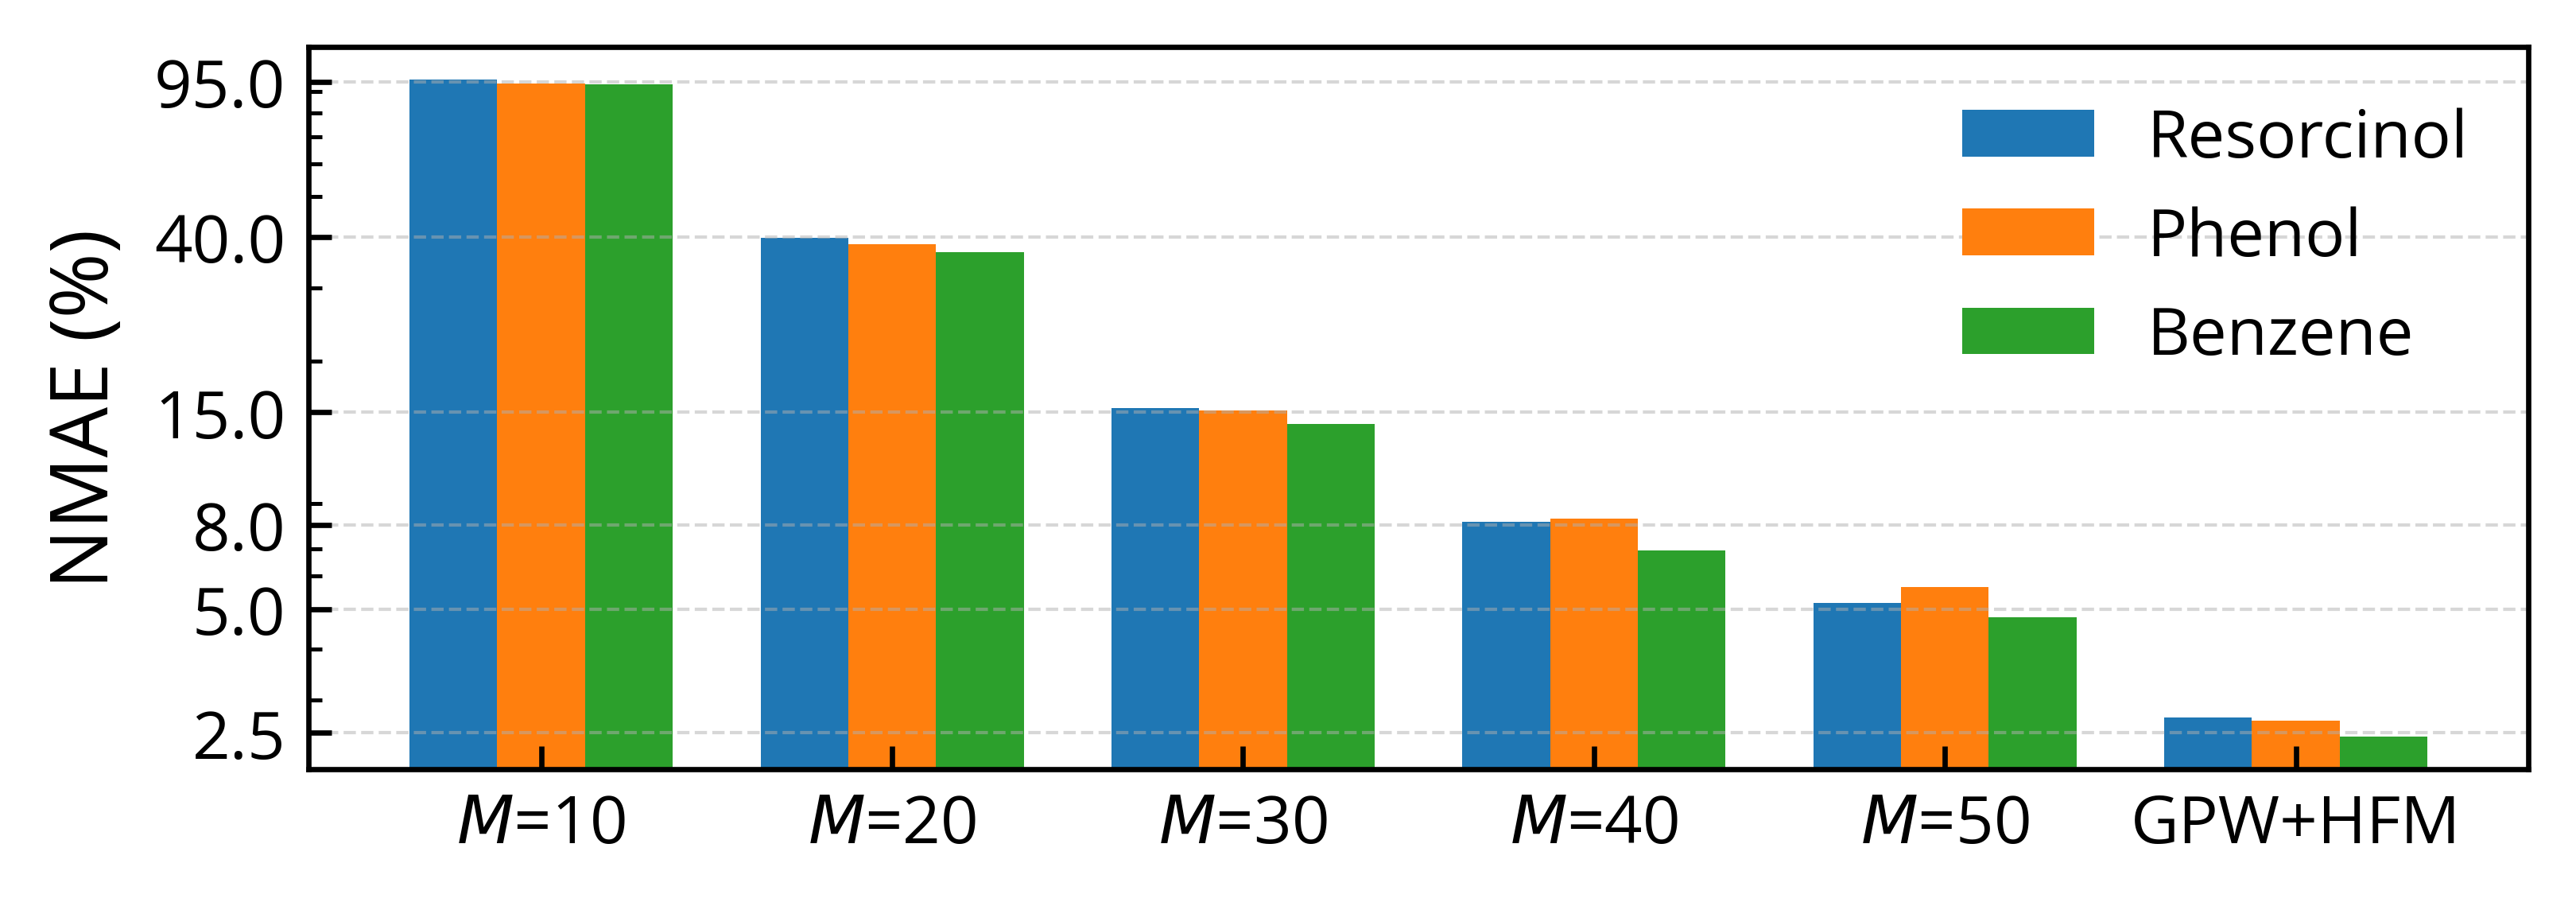

In [20]:
# import seaborn as sns
# sns.set_theme('whitegrid')
# for style in plt.style.available:
import matplotlib
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams['font.family'] = ['Open Sans']
# matplotlib.rcParams['font.family'] = ['DejaVu Sans']


fig, ax = plt.subplots()
fig.set_size_inches(5.5, 2.0)
fig.set_dpi(600)
ax.grid(axis='y',linestyle='--',linewidth=0.5,alpha=0.5)
# ax.set_facecolor('#F2F2F2')
# ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f'))

c1 = 'tab:blue'
c2 = 'tab:orange'
c3 = 'tab:green'

x = [10,20,30,40,50]
Resorcinol =    [x,[96.11,39.70,15.36,8.12,5.18],'Resorcinol','s',c1]
Phenol =        [x,[94.06,38.41,15.18,8.27,5.66],'Phenol','^',c2]
Benezene =      [x,[93.81,36.71,14.04,6.92,4.77],'Benzene','o',c3,]
avg =           [x,[94.66,38.27,14.86,7.77,5.20],'Average','--',None]
md_list = [Resorcinol,Phenol,Benezene]
# plt.plot(avg[0],avg[1],avg[3],color='gray',linewidth=0.5)

width = 2.5
for i,md in enumerate(md_list):
    offset = width*(i-1)
    rects = ax.bar(np.array(md[0]) + offset,md[1],width=width,color=md[4],label=md[2])
    # ax.bar_label(rects, padding=3,fontsize=4)
    # if md[3] is None:
    #     xytext = (10,-3)
    # else:
    #     xytext = md[3]
    # ax.annotate(md[2], (md[0][-1], md[1][-1]), textcoords="offset points", xytext=xytext, ha='left',color='k')
# plt.plot(40,2.45,'o',color='tab:blue',fillstyle='none')
# plt.plot(40,2.68,'^',color='tab:orange',fillstyle='none')
# plt.plot(40,2.73,'s',color='tab:green',fillstyle='none')
ax.bar(60-width,2.73,width,color=c1)
ax.bar(60,2.68,width,color=c2)
# ax.bar(60+width,2.45,width,color='tab:green')
ax.bar(60+width,2.45,width,color=c3)
# goodred = "#DF6B63"
# goodblue = "#546BDF"
# goodpurple = "#8C6CE7"
# goodgreen = "#40DE66"


# ax.annotate("(Best) GTO+PW+HFM",(40,2.5),textcoords="offset points", xytext=(-10,0), ha='right',color='k')
ax.set_yscale('log')
ax.tick_params(direction='in', which='both')

# ax.set_xlabel(r'Number of probe points $M$',size='large')
ax.set_ylabel('NMAE (%)',size="large")
# ax.set_xlim([4e-1,0.8e2])
# ax.set_ylim([2e-1,1e2])
# ax.yaxis.set_ticks([1e1,1e2,0.73])
# ax.xaxis.set_ticks([1e1,0.646])
# ax.yaxis.set_ticks([1e-2,1e-1,1e0,1e1,1e2])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_ticks([2.5,5.0,8,15.0,40.0,95])
ax.xaxis.set_ticks([10,20,30,40,50,60])
ax.set_xticklabels([r'$M$=10',r'$M$=20',r'$M$=30',r'$M$=40',r'$M$=50','GPW-NO'])
# ax.set_title(r'Number of probe points $M$ vs. NMAE on MD',size="large",color='k')
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('probe_vs_nmae.pdf',dpi=600,bbox_inches='tight')
plt.show()

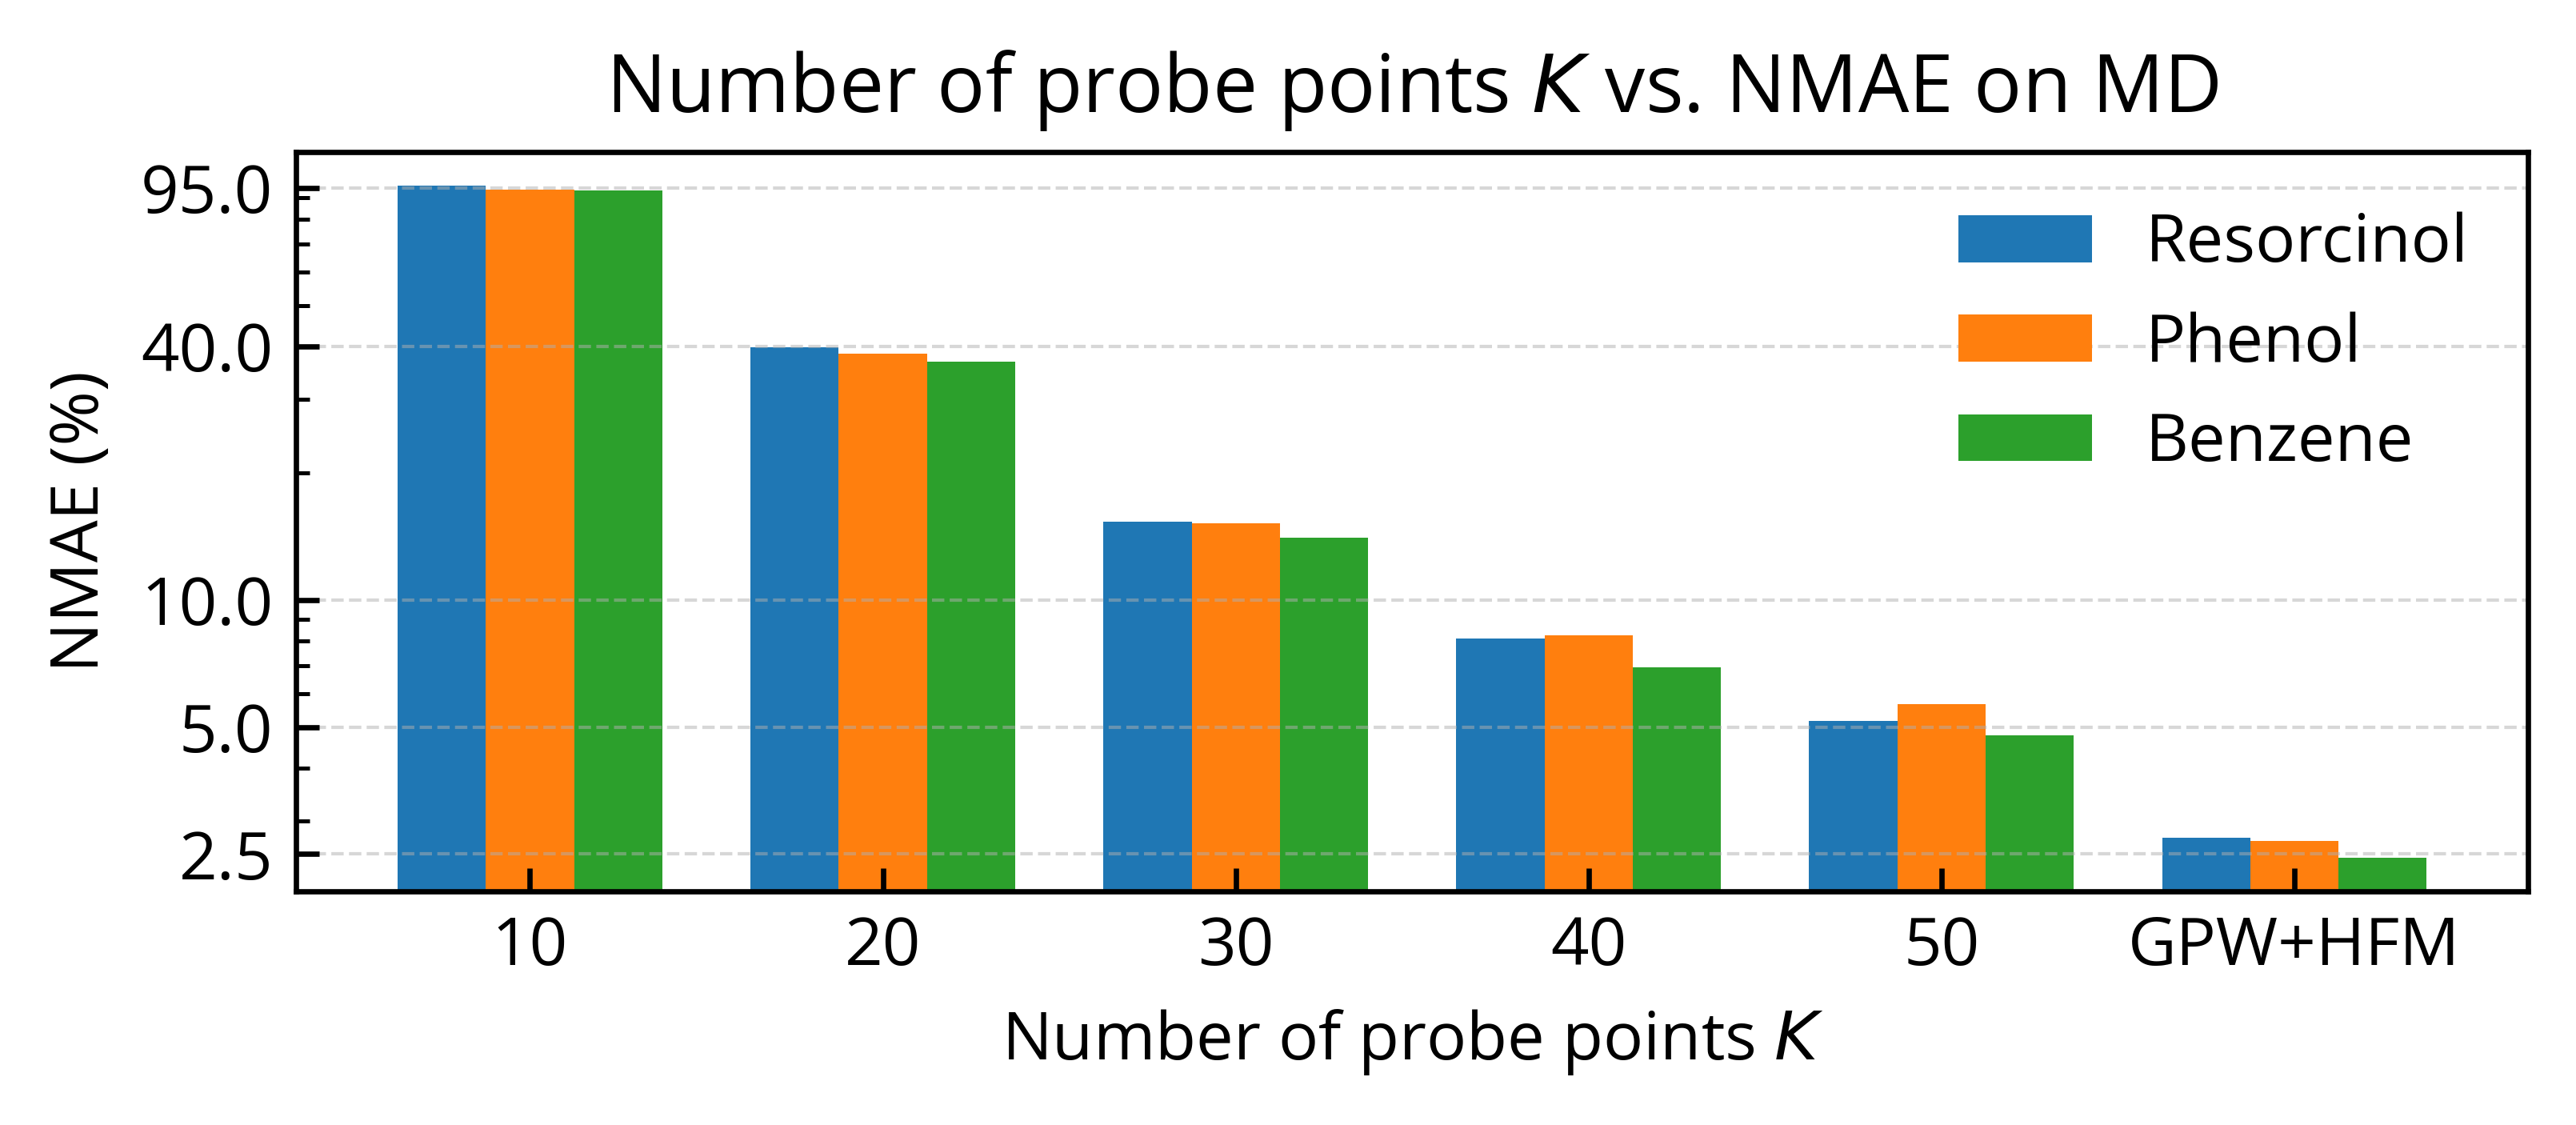

In [38]:
# import seaborn as sns
# sns.set_theme('whitegrid')
# for style in plt.style.available:
import matplotlib
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams['font.family'] = ['Open Sans']
# matplotlib.rcParams['font.family'] = ['DejaVu Sans']


fig, ax = plt.subplots()
fig.set_size_inches(6, 2)
fig.set_dpi(600)
ax.grid(axis='y',linestyle='--',linewidth=0.5,alpha=0.5)
# ax.set_facecolor('#F2F2F2')
# ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f'))

c1 = 'tab:blue'
c2 = 'tab:orange'
c3 = 'tab:green'

x = [10,20,30,40,50]
Resorcinol =    [x,[96.11,39.70,15.36,8.12,5.18],'Resorcinol','s',c1]
Phenol =        [x,[94.06,38.41,15.18,8.27,5.66],'Phenol','^',c2]
Benezene =      [x,[93.81,36.71,14.04,6.92,4.77],'Benzene','o',c3,]
avg =           [x,[94.66,38.27,14.86,7.77,5.20],'Average','--',None]
md_list = [Resorcinol,Phenol,Benezene]
# plt.plot(avg[0],avg[1],avg[3],color='gray',linewidth=0.5)

width = 2.5
for i,md in enumerate(md_list):
    offset = width*(i-1)
    rects = ax.bar(np.array(md[0]) + offset,md[1],width=width,color=md[4],label=md[2])
    # ax.bar_label(rects, padding=3,fontsize=4)
    # if md[3] is None:
    #     xytext = (10,-3)
    # else:
    #     xytext = md[3]
    # ax.annotate(md[2], (md[0][-1], md[1][-1]), textcoords="offset points", xytext=xytext, ha='left',color='k')
# plt.plot(40,2.45,'o',color='tab:blue',fillstyle='none')
# plt.plot(40,2.68,'^',color='tab:orange',fillstyle='none')
# plt.plot(40,2.73,'s',color='tab:green',fillstyle='none')
ax.bar(60-width,2.73,width,color=c1)
ax.bar(60,2.68,width,color=c2)
# ax.bar(60+width,2.45,width,color='tab:green')
ax.bar(60+width,2.45,width,color=c3)
# goodred = "#DF6B63"
# goodblue = "#546BDF"
# goodpurple = "#8C6CE7"
# goodgreen = "#40DE66"


# ax.annotate("(Best) GTO+PW+HFM",(40,2.5),textcoords="offset points", xytext=(-10,0), ha='right',color='k')
ax.set_yscale('log')
ax.tick_params(direction='in', which='both')

ax.set_xlabel(r'Number of probe points $K$')
ax.set_ylabel('NMAE (%)')
# ax.set_xlim([4e-1,0.8e2])
# ax.set_ylim([2e-1,1e2])
# ax.yaxis.set_ticks([1e1,1e2,0.73])
# ax.xaxis.set_ticks([1e1,0.646])
# ax.yaxis.set_ticks([1e-2,1e-1,1e0,1e1,1e2])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_ticks([2.5,5.0,10.0,40.0,95])
ax.xaxis.set_ticks([10,20,30,40,50,60])
ax.set_xticklabels(['10','20','30','40','50','GPW+HFM'])
ax.set_title(r'Number of probe points $K$ vs. NMAE on MD',size="large")
ax.legend(frameon=False)
plt.savefig('probe_vs_nmae.pdf',dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
# import seaborn as sns
# sns.set_theme('whitegrid')
# for style in plt.style.available:
import matplotlib
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
# matplotlib.rcParams['font.family'] = ['Open Sans']
matplotlib.rcParams['font.family'] = ['DejaVu Sans']


fig, ax = plt.subplots()
fig.set_size_inches(5, 2.5)
fig.set_dpi(600)
# ax.set_facecolor('#F2F2F2')
# ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f'))

x = [10,20,30,40,50]
Benezene =      [x,[93.81,36.71,14.04,6.92,4.77],'Benzene','o',None,]
Phenol =        [x,[94.06,38.41,15.18,8.27,5.66],'Phenol','^',None]
Resorcinol =    [x,[96.11,39.70,15.36,8.12,5.18],'Resorcinol','s',None]
avg =           [x,[94.66,38.27,14.86,7.77,5.20],'Average','--',None]
md_list = [Benezene,Phenol,Resorcinol]
plt.plot(avg[0],avg[1],avg[3],color='gray',linewidth=0.5)
for md in md_list:
    ax.plot(md[0],md[1],md[3],label=md[2],color=md[4],fillstyle='none')
    # if md[3] is None:
    #     xytext = (10,-3)
    # else:
    #     xytext = md[3]
    # ax.annotate(md[2], (md[0][-1], md[1][-1]), textcoords="offset points", xytext=xytext, ha='left',color='k')
plt.plot(40,2.45,'o',color='tab:blue',fillstyle='none')
plt.plot(40,2.68,'^',color='tab:orange',fillstyle='none')
plt.plot(40,2.73,'s',color='tab:green',fillstyle='none')
ax.annotate("(Best) GTO+PW+HFM",(40,2.5),textcoords="offset points", xytext=(-10,0), ha='right',color='k')
ax.set_yscale('log')
ax.tick_params(direction='in', which='both')

ax.set_xlabel('Number of probe points')
ax.set_ylabel('NMAE (%)')
# ax.set_xlim([4e-1,0.8e2])
# ax.set_ylim([2e-1,1e2])
# ax.yaxis.set_ticks([1e1,1e2,0.73])
# ax.xaxis.set_ticks([1e1,0.646])
# ax.yaxis.set_ticks([1e-2,1e-1,1e0,1e1,1e2])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_ticks([2.5,5.0,10.0,40.0])
ax.xaxis.set_ticks([10,20,30,40,50])
ax.set_title('Number of probe points vs. NMAE on MD',color='k')
ax.legend(frameon=False)
plt.savefig('probe_vs_nmae.pdf',dpi=600,bbox_inches='tight')
plt.show()

AttributeError: 'Axes' object has no attribute 'barplot'

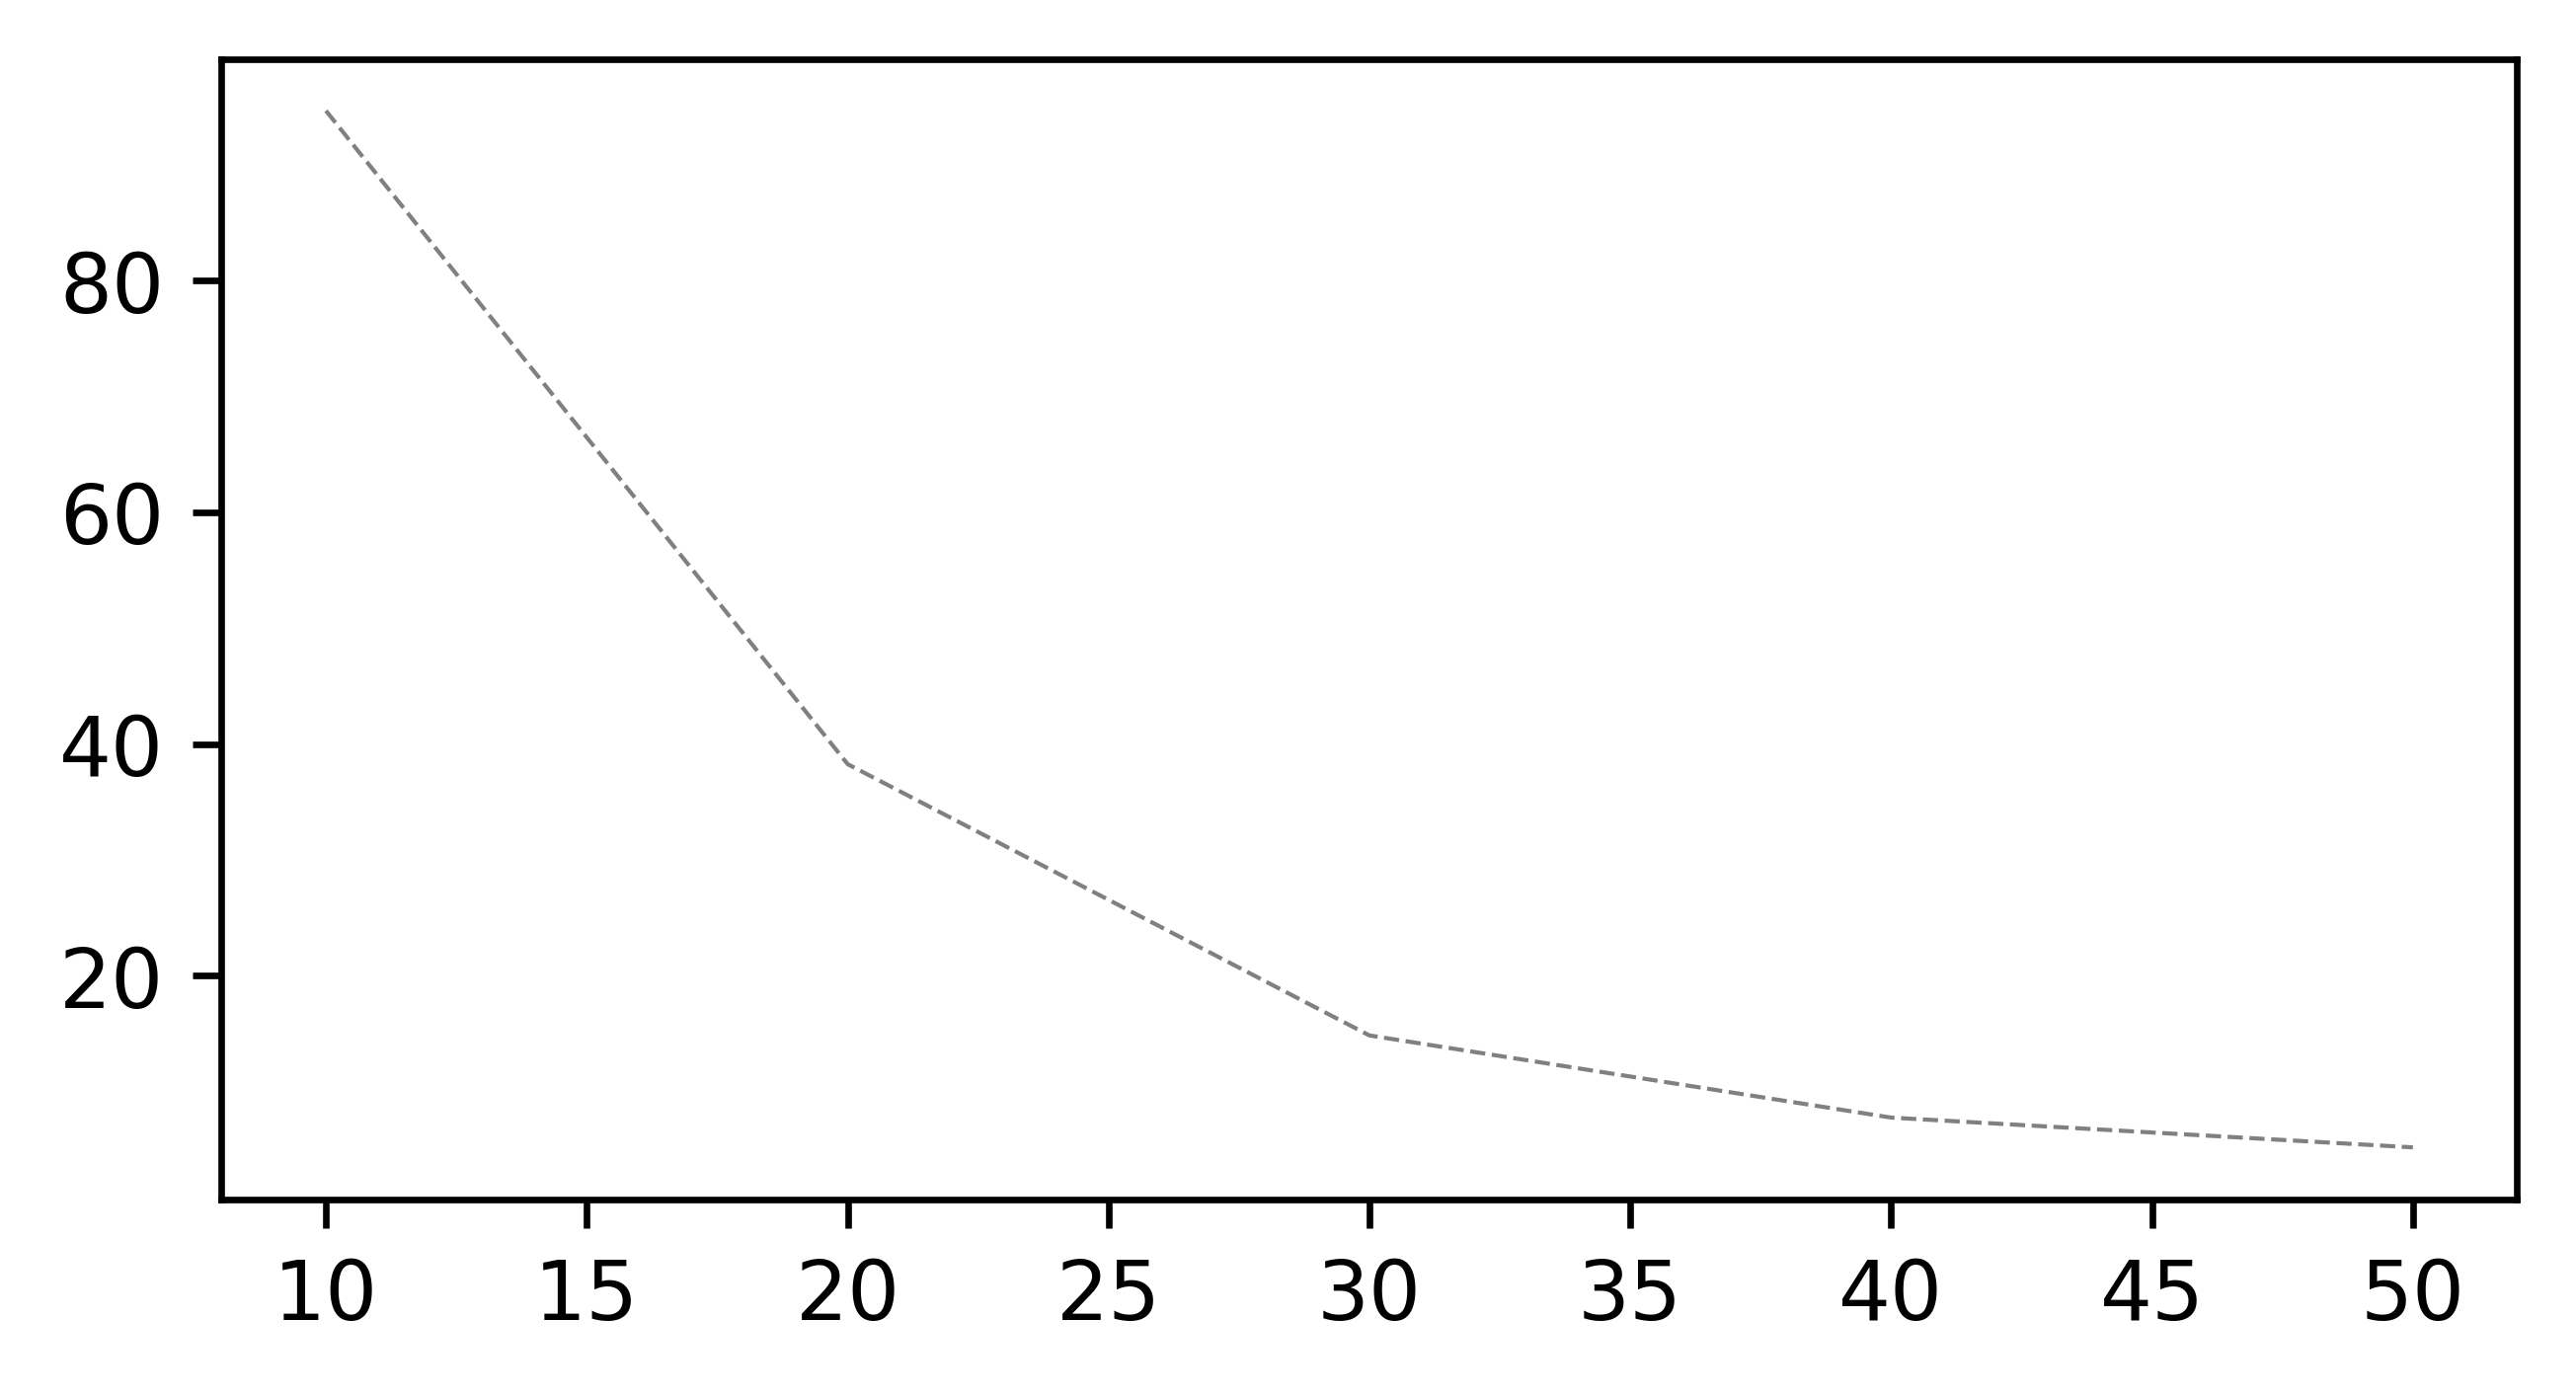

In [258]:
# import seaborn as sns
# sns.set_theme('whitegrid')
# for style in plt.style.available:
import matplotlib
from matplotlib import ticker
from matplotlib.ticker import ScalarFormatter
# matplotlib.rcParams['font.family'] = ['Open Sans']
matplotlib.rcParams['font.family'] = ['DejaVu Sans']


fig, ax = plt.subplots()
fig.set_size_inches(5, 2.5)
fig.set_dpi(600)
# ax.set_facecolor('#F2F2F2')
# ax.xaxis.set_minor_formatter(ticker.NullFormatter())
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%f'))

x = [10,20,30,40,50]
Benezene =      [x,[93.81,36.71,14.04,6.92,4.77],'Benzene','o',None,]
Phenol =        [x,[94.06,38.41,15.18,8.27,5.66],'Phenol','^',None]
Resorcinol =    [x,[96.11,39.70,15.36,8.12,5.18],'Resorcinol','s',None]
avg =           [x,[94.66,38.27,14.86,7.77,5.20],'Average','--',None]
md_list = [Benezene,Phenol,Resorcinol]
plt.plot(avg[0],avg[1],avg[3],color='gray',linewidth=0.5)
for md in md_list:
    ax.plot(md[0],md[1],md[3],label=md[2],color=md[4],fillstyle='none')
    # if md[3] is None:
    #     xytext = (10,-3)
    # else:
    #     xytext = md[3]
    # ax.annotate(md[2], (md[0][-1], md[1][-1]), textcoords="offset points", xytext=xytext, ha='left',color='k')
plt.plot(40,2.45,'o',color='tab:blue',fillstyle='none')
plt.plot(40,2.68,'^',color='tab:orange',fillstyle='none')
plt.plot(40,2.73,'s',color='tab:green',fillstyle='none')
ax.annotate("(Best) GTO+PW+HFM",(40,2.5),textcoords="offset points", xytext=(-10,0), ha='right',color='k')
ax.set_yscale('log')
ax.tick_params(direction='in', which='both')

ax.set_xlabel('Number of probe points')
ax.set_ylabel('NMAE (%)')
# ax.set_xlim([4e-1,0.8e2])
# ax.set_ylim([2e-1,1e2])
# ax.yaxis.set_ticks([1e1,1e2,0.73])
# ax.xaxis.set_ticks([1e1,0.646])
# ax.yaxis.set_ticks([1e-2,1e-1,1e0,1e1,1e2])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.yaxis.set_ticks([2.5,5.0,10.0,40.0])
ax.xaxis.set_ticks([10,20,30,40,50])
ax.set_title('Number of probe points vs. NMAE on MD',color='k')
ax.legend(frameon=False)
plt.savefig('probe_vs_nmae.pdf',dpi=600,bbox_inches='tight')
plt.show()

In [69]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 6.9 MB/s eta 0:00:00
